# Demo Run

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

In [3]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)

    import os
    import sys
    import gc
    import warnings
    import anndata as ad
    import scanpy as sc
    import torch
    import numpy as np
    import pandas as pd
    import itertools
    from scipy.spatial.distance import euclidean

    sys.path.append("/Users/aleynakara/Documents/tardis")
    import tardis
    tardis.config = tardis.config_local
    
    sc.settings.verbosity = 3
    
    print(f"CUDA used: {torch.cuda.is_available()}")

CUDA used: False


In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    adata_file_path = os.path.join(tardis.config.io_directories["processed"], "cpa_Norman2019_prep_new.h5ad")
    assert os.path.isfile(adata_file_path), f"File not already exist: `{adata_file_path}`"
    adata = ad.read_h5ad(adata_file_path)
adata

AnnData object with n_obs × n_vars = 108497 × 5000
    obs: 'cov_drug_dose_name', 'dose_val', 'control', 'condition', 'guide_identity', 'drug_dose_name', 'cell_type', 'split', 'split1', 'split2', 'split3', 'split4', 'split5', 'split6', 'split7', 'split8', 'split9', 'split10', 'split11', 'split12', 'split13', 'split14', 'split15', 'split16', 'split17', 'split18', 'split19', 'split20', 'split21', 'split22', 'split23', 'split24', 'split25'
    var: 'gene_symbols', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'rank_genes_groups_cov'
    layers: 'counts'

In [5]:
adata.X = adata.layers["counts"].copy()
del adata.layers
gc.collect()

32

In [6]:
adata.obs

,cov_drug_dose_name,dose_val,control,condition,guide_identity,drug_dose_name,cell_type,split,split1,split2,...,split16,split17,split18,split19,split20,split21,split22,split23,split24,split25
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAGAAGC-1,A549_ctrl_1,1,1,ctrl,NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,ctrl_1,A549,train,train,train,...,train,train,train,train,train,train,train,train,train,train
AAACCTGAGGCATGTG-1,A549_TSC22D1+ctrl_1+1,1+1,0,TSC22D1+ctrl,TSC22D1_NegCtrl0__TSC22D1_NegCtrl0,TSC22D1+ctrl_1+1,A549,train,train,train,...,train,train,train,train,train,train,train,train,train,train
AAACCTGAGGCCCTTG-1,A549_KLF1+MAP2K6_1+1,1+1,0,KLF1+MAP2K6,KLF1_MAP2K6__KLF1_MAP2K6,KLF1+MAP2K6_1+1,A549,train,train,train,...,ood,ood,ood,ood,ood,train,train,ood,train,train
AAACCTGCACGAAGCA-1,A549_ctrl_1,1,1,ctrl,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,ctrl_1,A549,train,test,train,...,train,train,train,train,train,train,train,train,test,test
AAACCTGCAGACGTAG-1,A549_CEBPE+RUNX1T1_1+1,1+1,0,CEBPE+RUNX1T1,CEBPE_RUNX1T1__CEBPE_RUNX1T1,CEBPE+RUNX1T1_1+1,A549,train,train,train,...,train,train,train,train,train,train,train,ood,train,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAGTACGT-8,A549_FOXA3+ctrl_1+1,1+1,0,FOXA3+ctrl,FOXA3_NegCtrl0__FOXA3_NegCtrl0,FOXA3+ctrl_1+1,A549,test,test,test,...,train,train,test,train,train,train,test,train,train,train
TTTGTCATCCACTCCA-8,A549_CELF2+ctrl_1+1,1+1,0,CELF2+ctrl,CELF2_NegCtrl0__CELF2_NegCtrl0,CELF2+ctrl_1+1,A549,train,train,train,...,train,train,train,test,train,train,train,train,train,train
TTTGTCATCCCAACGG-8,A549_BCORL1+ctrl_1+1,1+1,0,BCORL1+ctrl,BCORL1_NegCtrl0__BCORL1_NegCtrl0,BCORL1+ctrl_1+1,A549,train,test,train,...,train,train,train,train,train,train,train,train,train,train


## Load Model

In [7]:
dir_path = os.path.join(
    tardis.config.io_directories["models"],
    "run10"
)
vae = tardis.MyModel.load(dir_path, adata=adata)

INFO     File /Users/aleynakara/Documents/tardis/data/models/run10/model.pt already downloaded                     


# Visualization

In [8]:
def prepare(ad_latent):
    sc.pp.neighbors(ad_latent, n_neighbors = 30)
    sc.tl.umap(ad_latent)

In [9]:
latent = ad.AnnData(X=vae.get_latent_representation(), obs=adata.obs.copy())
prepare(latent)
latent

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:28)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:03)


AnnData object with n_obs × n_vars = 108497 × 48
    obs: 'cov_drug_dose_name', 'dose_val', 'control', 'condition', 'guide_identity', 'drug_dose_name', 'cell_type', 'split', 'split1', 'split2', 'split3', 'split4', 'split5', 'split6', 'split7', 'split8', 'split9', 'split10', 'split11', 'split12', 'split13', 'split14', 'split15', 'split16', 'split17', 'split18', 'split19', 'split20', 'split21', 'split22', 'split23', 'split24', 'split25', '_scvi_batch', '_scvi_labels'
    uns: 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

In [10]:
unique_genes = set()
for genes in latent.obs["condition"].unique():
    unique_genes.update(genes.split("+"))

print(f"{len(unique_genes)} genes are used in the latent space.")

106 genes are used in the latent space.


In [11]:
np.random.seed(42)

def plot_latent(data, genes=None, n_genes=1, save_path=None):
    control_points = data[data.obs["condition"] == "ctrl"]
    if genes is None:
        genes = np.random.choice(list(unique_genes), n_genes)

    plotted_data = control_points.copy()
    for gene in genes:
        plotted_data = plotted_data.concatenate(data[data.obs["condition"] == f"{gene}+ctrl"])
        plotted_data = plotted_data.concatenate(data[data.obs["condition"] == f"ctrl+{gene}"])
    
    title = f"Latent space of {', '.join(genes)}"
    sc.pl.umap(plotted_data, color="condition", title=title, save=save_path)

/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/3478039875.py:10: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  plotted_data = plotted_data.concatenate(data[data.obs["condition"] == f"{gene}+ctrl"])
/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/3478039875.py:11: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  plotted_data = plotted_data.concatenate(data[data.obs["condition"] == f"ctrl+{gene}"])


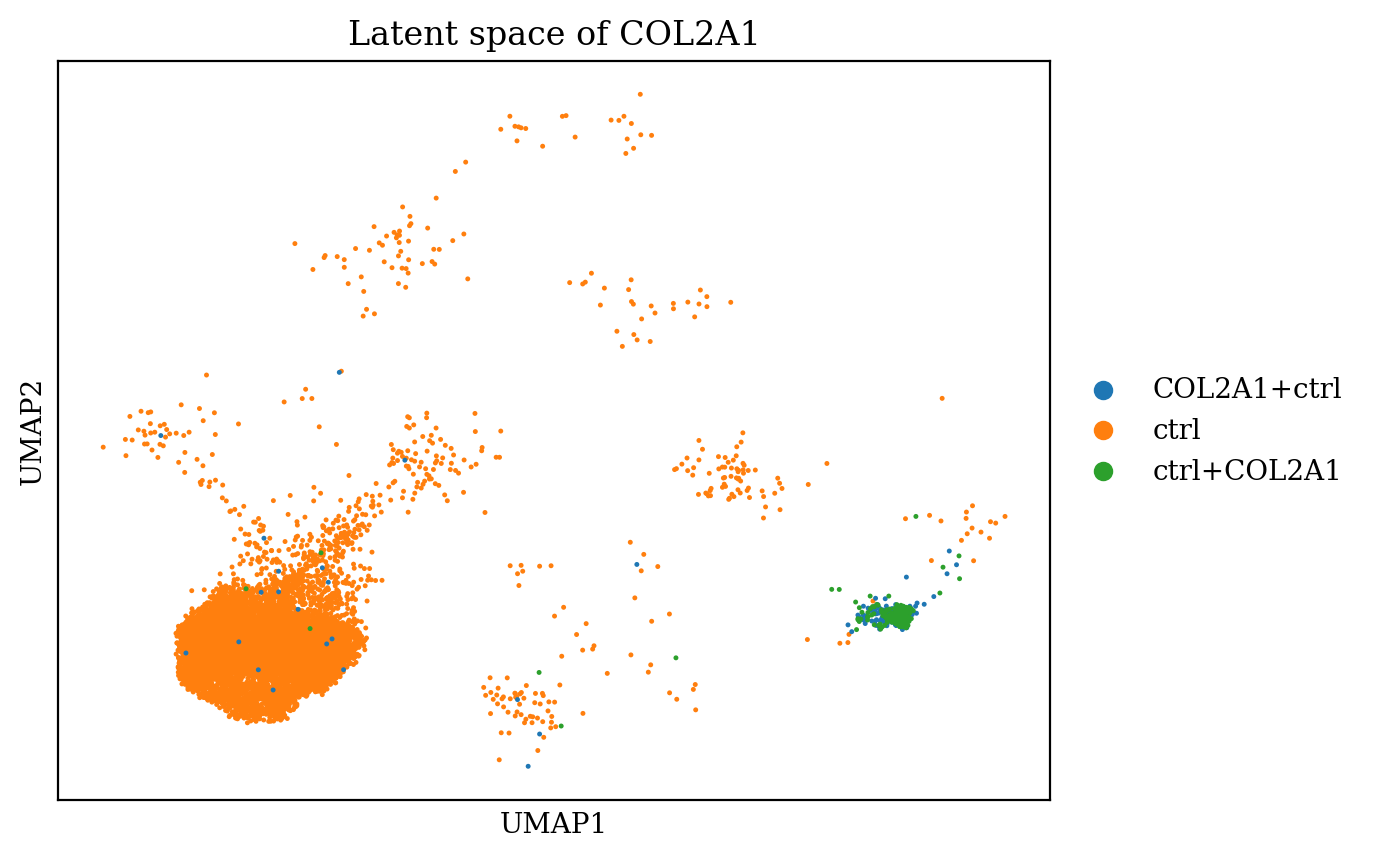

In [12]:
n_genes = 1
plot_latent(latent, n_genes=n_genes, save_path=None)

In [13]:
# sc.tl.paga(latent, groups="condition")
# sc.pl.paga(latent)

/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/3478039875.py:10: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  plotted_data = plotted_data.concatenate(data[data.obs["condition"] == f"{gene}+ctrl"])
/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/3478039875.py:11: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  plotted_data = plotted_data.concatenate(data[data.obs["condition"] == f"ctrl+{gene}"])
/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/3478039875.py:10: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed

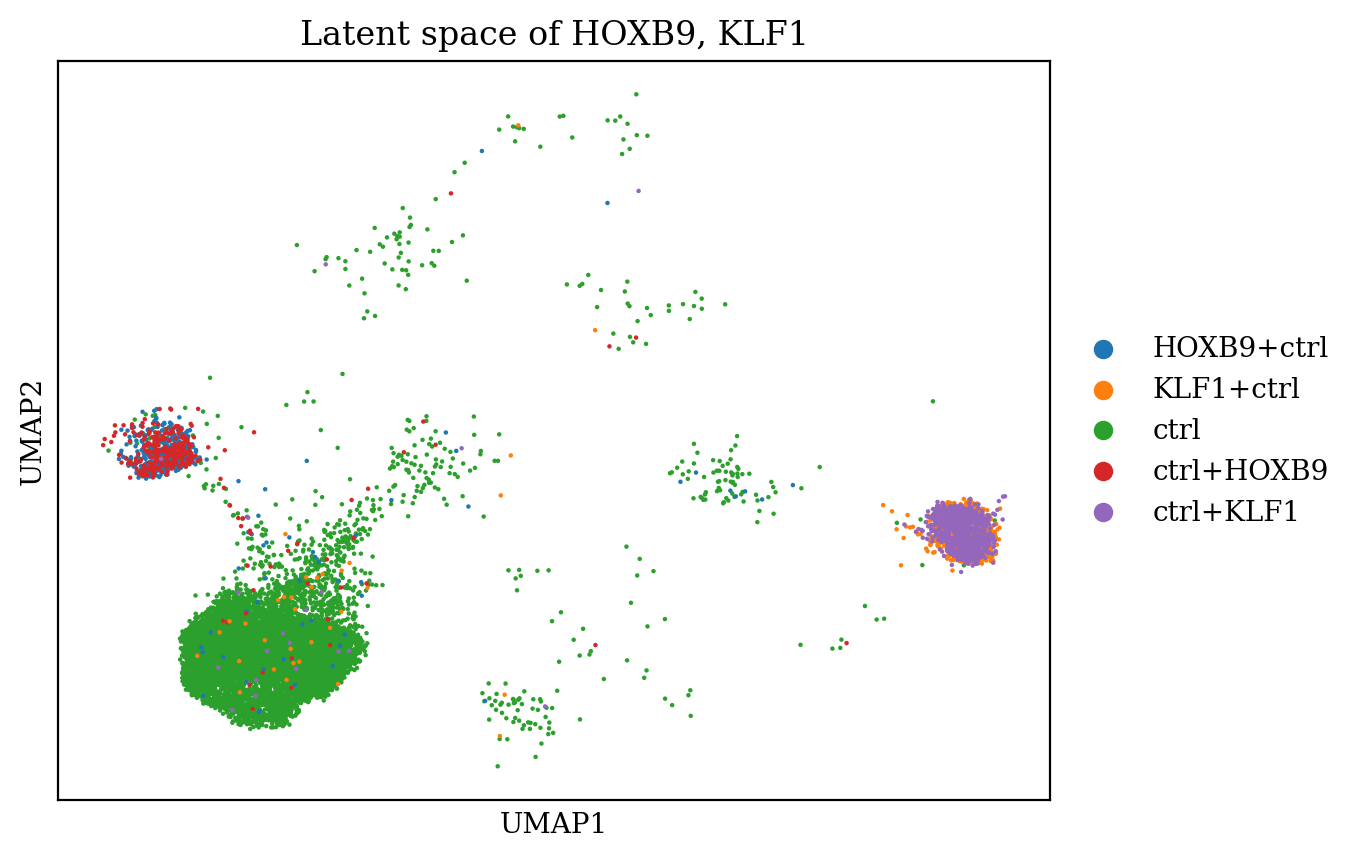

In [14]:
n_genes = 2
plot_latent(latent, n_genes=n_genes, save_path=None)

In [15]:
df = latent.obs["condition"].reset_index()
df[["UMAP1", "UMAP2"]] = latent.obsm["X_umap"]
df

,index,condition,UMAP1,UMAP2
0,AAACCTGAGAAGAAGC-1,ctrl,-2.678823,-0.638934
1,AAACCTGAGGCATGTG-1,TSC22D1+ctrl,-3.621482,-1.154681
2,AAACCTGAGGCCCTTG-1,KLF1+MAP2K6,16.136858,0.921629
3,AAACCTGCACGAAGCA-1,ctrl,-5.328245,-2.468893
4,AAACCTGCAGACGTAG-1,CEBPE+RUNX1T1,10.220671,3.076293
...,...,...,...,...
108492,TTTGTCATCAGTACGT-8,FOXA3+ctrl,-7.496758,6.719115
108493,TTTGTCATCCACTCCA-8,CELF2+ctrl,-1.886771,-1.171800
108494,TTTGTCATCCCAACGG-8,BCORL1+ctrl,-8.285317,4.889061
108495,TTTGTCATCCTCCTAG-8,ZBTB10+PTPN12,3.254243,0.885025


In [16]:
df["condition_without_duplicate"] = df["condition"].apply(lambda x: x[:-5] if x.endswith("+ctrl") else (x[5:] if x.startswith("ctrl+") else x))

In [17]:
df.groupby("condition_without_duplicate").mean()

/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/3407763105.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("condition_without_duplicate").mean()


,UMAP1,UMAP2
condition_without_duplicate,,
AHR,5.914764,8.103018
AHR+FEV,5.984079,2.363014
AHR+KLF1,16.005644,2.024004
ARID1A,1.896634,1.217232
ARRDC3,-4.258821,-1.836460
...,...,...
ZC3HAV1+CEBPE,8.693762,3.165600
ZC3HAV1+HOXC13,5.276668,13.940432
ZNF318,-4.910500,0.481156


In [18]:
single_conditions = [cond for cond in df["condition_without_duplicate"].unique() if not "+" in cond and cond!="ctrl"]

In [19]:
mean_vectors = {condition: mean_vector.to_numpy() for condition, mean_vector in df.groupby("condition").mean().iterrows()}

/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/2354262608.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_vectors = {condition: mean_vector.to_numpy() for condition, mean_vector in df.groupby("condition").mean().iterrows()}


In [20]:
def get_closest(target_mean_vector, mean_vectors, exclude=[]):
    closest_condition = None
    closest_distance = float('inf')

    for condition, mean_vector in mean_vectors.items():
        if condition not in exclude:
            distance = euclidean(target_mean_vector, mean_vector)
            if distance < closest_distance:
                closest_distance = distance
                closest_condition = condition
    
    return closest_condition, closest_distance

In [21]:
n, n_single = 0, 0
symmetric_singles, symmetric_pairs = set([]), set([])
nonsymmetric_singles, nonsymmetric_pairs = {}, {}

for gene1, gene2 in list(itertools.product(unique_genes, unique_genes)):
    original_condition = f"{gene1}+{gene2}"
    expected = f"{gene2}+{gene1}"
    
    if original_condition in symmetric_pairs or expected in symmetric_pairs:
        continue
    
    if original_condition not in mean_vectors or not expected in mean_vectors:
        continue
    
    if gene1 in symmetric_singles or gene2 in symmetric_singles:
        continue
    
    if original_condition in nonsymmetric_pairs or expected in nonsymmetric_pairs:
        continue
    
    if gene1 in nonsymmetric_singles or gene2 in nonsymmetric_singles:
        continue
      
    closest_condition, closest_distance = get_closest(mean_vectors[original_condition], mean_vectors, exclude=[original_condition])
    
    
    if closest_condition == expected:
        if gene1=="ctrl":  
            symmetric_singles.add(gene2)
        elif gene2=="ctrl":
            symmetric_singles.add(gene1)
        else:
            symmetric_pairs.add(original_condition)            
    else:
        if gene1=="ctrl":
            n_single +=1
            nonsymmetric_singles[gene2] = closest_condition
        elif gene2=="ctrl":
            nonsymmetric_singles[gene1] = closest_condition
        else:
            nonsymmetric_pairs[original_condition] = closest_condition
            

n_expected_single = len(symmetric_singles)
n_expected = len(symmetric_pairs) + n_expected_single
n_single = len(nonsymmetric_singles) + n_expected_single
n = len(nonsymmetric_pairs) + n_single

print(f"{n_expected} out of {n} are expected.")
print(f"{n_expected_single} out of {n_single} are expected.")

if n==n_single:
    print("All are single.")

18 out of 47 are expected.
18 out of 47 are expected.
All are single.


/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/3478039875.py:10: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  plotted_data = plotted_data.concatenate(data[data.obs["condition"] == f"{gene}+ctrl"])
/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/3478039875.py:11: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  plotted_data = plotted_data.concatenate(data[data.obs["condition"] == f"ctrl+{gene}"])


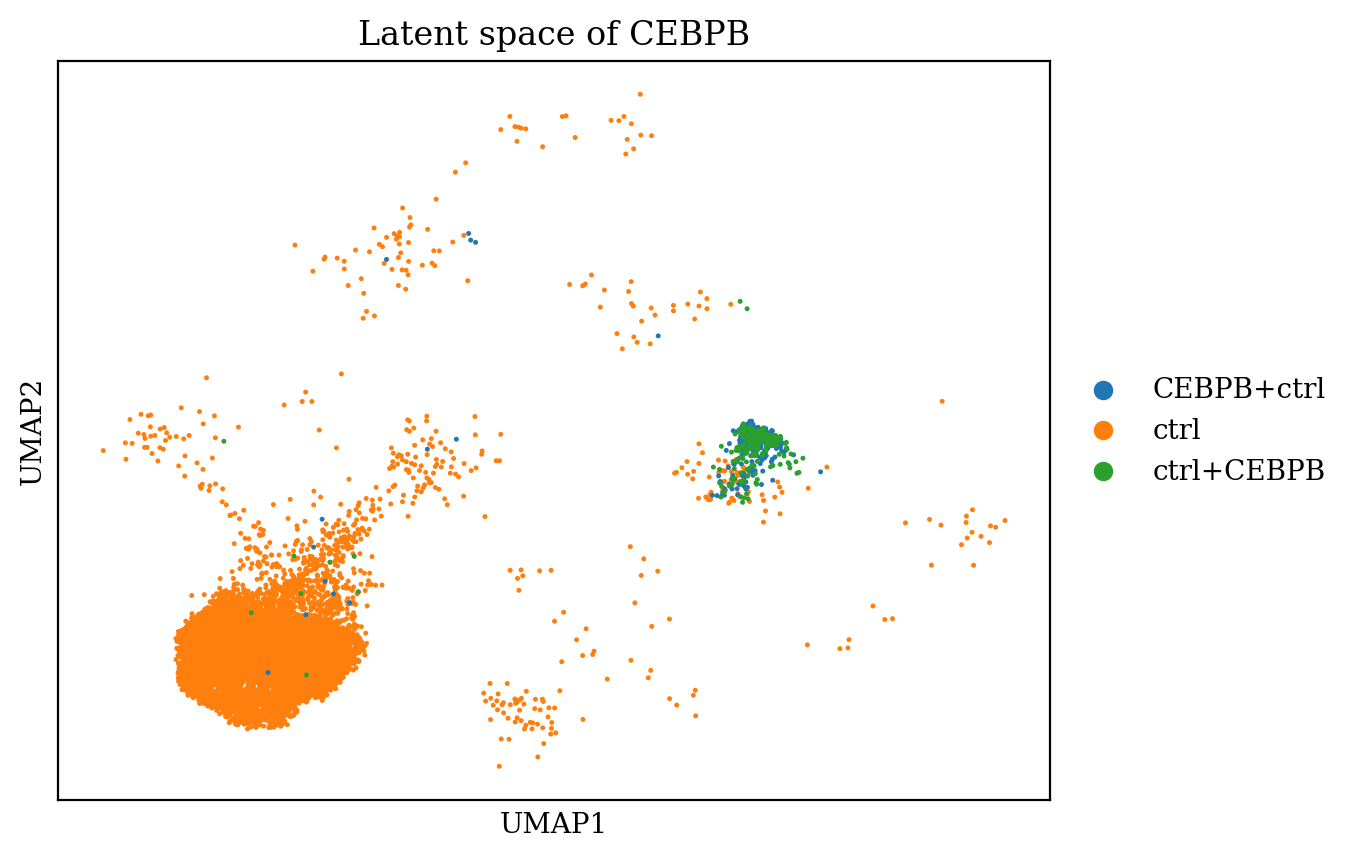

In [22]:
plot_latent(latent, genes=np.random.choice(list(symmetric_singles), 1))

In [23]:
nonsymmetric_singles

{'FEV': 'FEV+ISL2',
 'PRTG': 'IGDCC3+PRTG',
 'CNN1': 'CBL+CNN1',
 'IKZF3': 'MAP2K6+IKZF3',
 'PTPN9': 'CBL+ctrl',
 'IGDCC3': 'TGFBR2+PRTG',
 'ELMSAN1': 'MAP2K3+SLC38A2',
 'TBX3': 'SGK1+TBX3',
 'UBASH3B': 'CBL+ctrl',
 'BAK1': 'BCL2L11+ctrl',
 'SPI1': 'MAP2K6+SPI1',
 'CDKN1B': 'CITED1+ctrl',
 'TBX2': 'SGK1+TBX2',
 'HOXC13': 'RHOXF2+ctrl',
 'MAP2K6': 'ctrl+ELMSAN1',
 'CBFA2T3': 'UBASH3A+ctrl',
 'UBASH3A': 'MAP4K3+ctrl',
 'ETS2': 'ETS2+MAP7D1',
 'CEBPA': 'CEBPE+SPI1',
 'PTPN12': 'CBL+PTPN9',
 'KIF2C': 'MAP4K3+ctrl',
 'IER5L': 'LYL1+IER5L',
 'MEIS1': 'MAP4K5+ctrl',
 'TGFBR2': 'ctrl+STIL',
 'FOXL2': 'ZNF318+FOXL2',
 'FOXF1': 'POU3F2+ctrl',
 'RUNX1T1': 'CSRNP1+ctrl',
 'ISL2': 'KIF18B+KIF2C',
 'STIL': 'ctrl+TGFBR2'}

/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/3478039875.py:10: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  plotted_data = plotted_data.concatenate(data[data.obs["condition"] == f"{gene}+ctrl"])
/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/3478039875.py:11: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  plotted_data = plotted_data.concatenate(data[data.obs["condition"] == f"ctrl+{gene}"])
/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/3478039875.py:10: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed

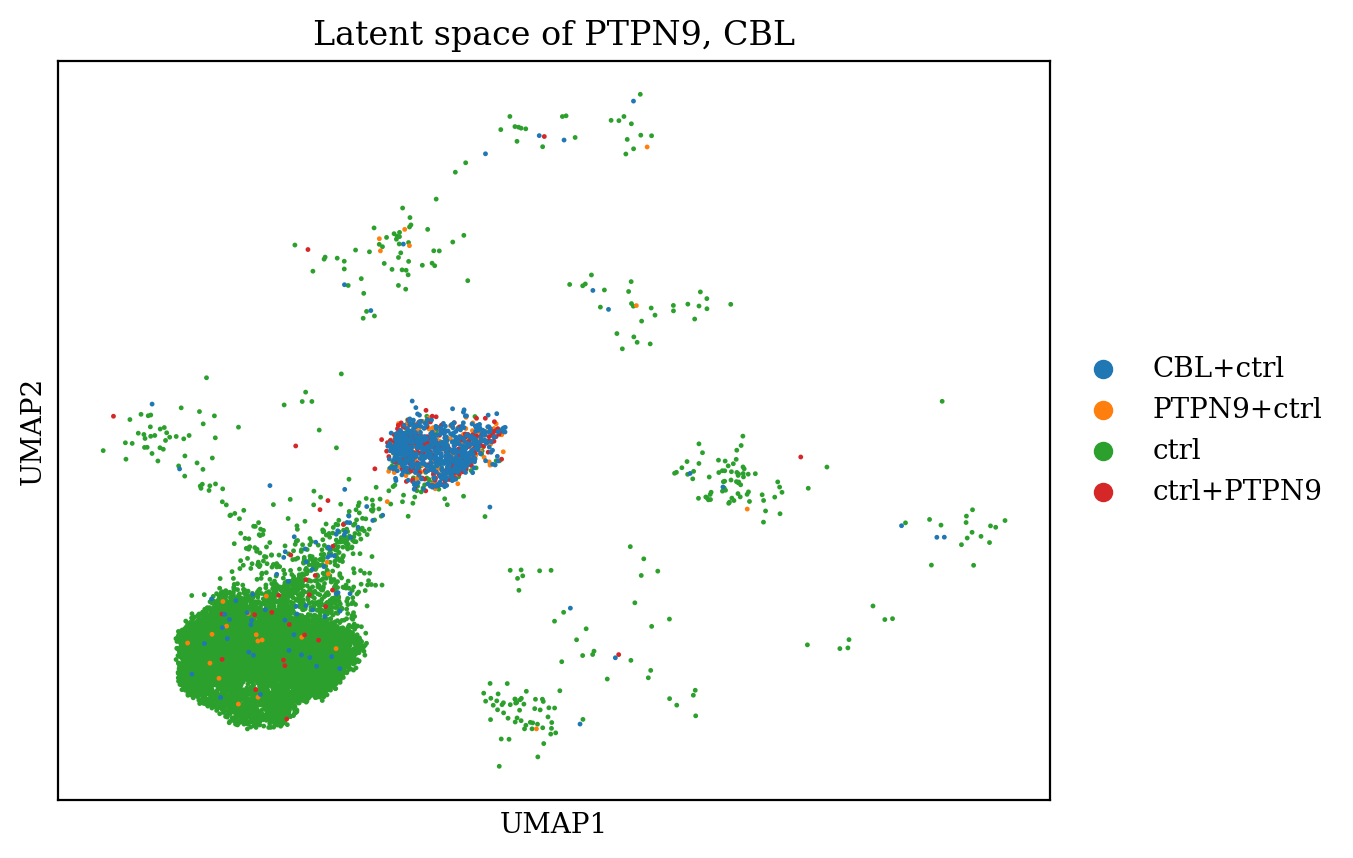

In [24]:
genes = ["PTPN9", "CBL"]
plot_latent(latent, genes=genes, save_path=None)

In [25]:
mean_without_duplicate = {condition: mean_vector.to_numpy() for condition, mean_vector in df.groupby("condition_without_duplicate").mean().iterrows()}

/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_42831/27577903.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_without_duplicate = {condition: mean_vector.to_numpy() for condition, mean_vector in df.groupby("condition_without_duplicate").mean().iterrows()}


In [26]:
mean_single = {gene:mean_without_duplicate[gene] for gene in single_conditions}
mean_pairs = {condition:mean_without_duplicate[condition]-mean_without_duplicate["ctrl"] for condition in mean_without_duplicate.keys() if condition not in unique_genes}

In [27]:
n_linear, n_total = 0, 0

for pair in mean_pairs.keys():
    gene1, gene2 = pair.split("+")
    if gene1 in mean_single and gene2 in mean_single:
        expected_mean_vector = mean_single[gene1] + mean_single[gene2] - mean_without_duplicate["ctrl"] *2
        
        closest_condition, closest_distance = get_closest(expected_mean_vector, mean_pairs)
        n_linear += int(closest_condition==pair)
        n_total += 1

print(f"{n_linear} out of {n_total} are linear.")

15 out of 131 are linear.
